In [45]:
import pandas as pd
data_dir = './tas_NLD/'

data = pd.concat([pd.read_csv(data_dir + f'tas_{d}_NLD.csv') for d in ['1901_1930', '1931_1960', '1961_1990', '1991_2016']])
data.columns = [col.strip() for col in data.columns]
data['Statistics'] = data['Statistics'].apply(lambda s: s.strip())
display(data.head())

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.65730,1901,Jan Average,Netherlands,NLD
1,-1.22310,1901,Feb Average,Netherlands,NLD
2,3.62608,1901,Mar Average,Netherlands,NLD
3,8.75660,1901,Apr Average,Netherlands,NLD
4,12.27800,1901,May Average,Netherlands,NLD


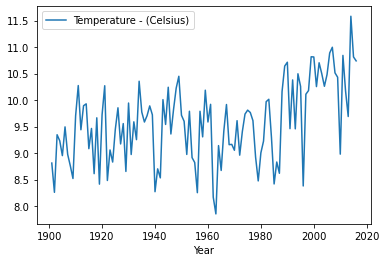

In [31]:
avg_temp_year = data.groupby('Year').mean()
avg_temp_year['Year'] = avg_temp_year.index
avg_temp_year.plot(x = 'Year', y = 'Temperature - (Celsius)')

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(avg_temp_year[['Year']], avg_temp_year['Temperature - (Celsius)'])

avg_temp_year['Fit'] = model.predict(avg_temp_year[['Year']])

In [35]:
avg_temp_year

,Temperature - (Celsius),Year,Fit
Year,,,
1901,8.812263,1901,8.998422
1902,8.260148,1902,9.008453
1903,9.346974,1903,9.018484
1904,9.233290,1904,9.028515
1905,8.952838,1905,9.038547
...,...,...,...
2012,10.170876,2012,10.111891
2013,9.690972,2013,10.121922
2014,11.583022,2014,10.131954


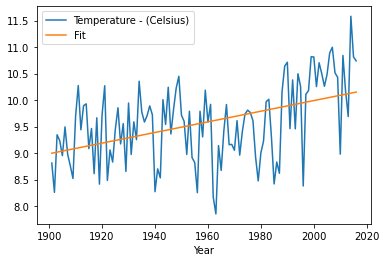

In [37]:
avg_temp_year.plot(x = 'Year', y = ['Temperature - (Celsius)', 'Fit'])

In [81]:
year = data['Year'][data['Statistics'] == 'Aug Average'].reset_index(drop=True)
jun = data['Temperature - (Celsius)'][data['Statistics'] == 'Jun Average'].reset_index(drop=True)
jul = data['Temperature - (Celsius)'][data['Statistics'] == 'Jul Average'].reset_index(drop=True)
aug = data['Temperature - (Celsius)'][data['Statistics'] == 'Aug Average'].reset_index(drop=True)
jun.name = 'June'
jul.name = 'July'
aug.name = 'August'

In [84]:
jun_jul_aug = pd.concat([year,jun, jul, aug],axis=1)

models = [LinearRegression() for x in range(3)]

fits = [(label, model.fit(jun_jul_aug[['Year']], jun_jul_aug[label])) for label, model in zip(['June', 'July', 'August'], models)]

for label, model in fits:
    jun_jul_aug[label + ' Fit'] = model.predict(jun_jul_aug[['Year']])

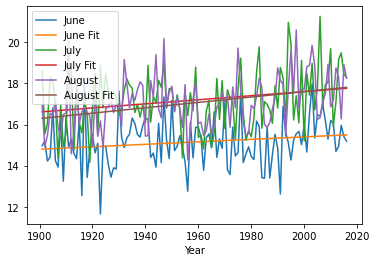

In [86]:
jun_jul_aug.plot(x='Year', y = ['June', 'June Fit', 'July', 'July Fit', 'August', 'August Fit'])

In [120]:

data['Decade'] = data['Year'].apply(lambda x: x//10*10)

In [121]:
avg_temp_decade = data.groupby('Decade').mean()
avg_temp_decade['Decade'] = avg_temp_decade.index

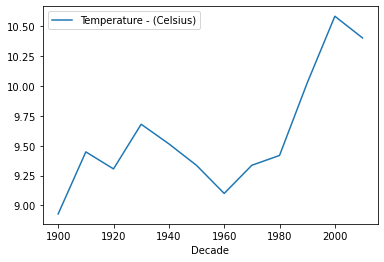

In [122]:
avg_temp_decade.plot(x = 'Decade', y = 'Temperature - (Celsius)')

In [123]:
model = LinearRegression()
model.fit(avg_temp_decade[['Decade']], avg_temp_decade['Temperature - (Celsius)'])
avg_temp_decade['Fit'] = model.predict(avg_temp_decade[['Decade']])

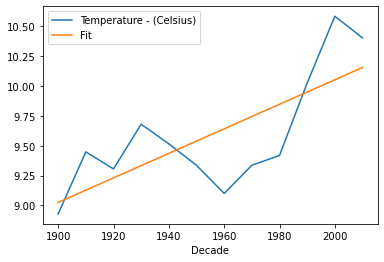

In [124]:
avg_temp_decade.plot(x = 'Decade', y = ['Temperature - (Celsius)', 'Fit'])